In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
figdir="/data/Phillippy/projects/HG002_Masseq/figure"

In [3]:
exp = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/05.quantification/noiseq.result.txt", 
                  sep = '\t',
                  header = 0).reset_index()
exp.columns = ['isoform','mat_mean', 'pat_mean', 'M', 'D', 'prob', 'ranking']
exp.head()

,isoform,mat_mean,pat_mean,M,D,prob,ranking
0,TCONS_00022257,1082.0,0.5,11.079485,1081.5,1.000000,1081.556751
1,TCONS_00019335,1427.0,0.5,11.478770,1426.5,1.000000,1426.546183
2,transcript78267.chr1.nnic,242.0,6928.0,-4.839360,6686.0,1.000000,-6686.001751
3,TCONS_00026689,10.0,857.0,-6.421223,847.0,0.999969,-847.024340
4,TCONS_00047762,27.0,720.0,-4.736966,693.0,0.999923,-693.016189


In [4]:
df = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/10.interpretation/HST-HSM/isoquantOut/HST.all.intersect_HSM.tsv", sep = '\t' , header = None)
df.columns = ['hsm_chr', 'hsm_start','hsm_end','test','test','hsm_mat','hsm_pat','hsm_diff','hsm_diff_area','hsm_coor',
             'trans_chr','trans_start','trans_end','isoform','gene','tss','strand','features','overlapbp']
df.head(4)

,hsm_chr,hsm_start,hsm_end,test,test,hsm_mat,hsm_pat,hsm_diff,hsm_diff_area,hsm_coor,trans_chr,trans_start,trans_end,isoform,gene,tss,strand,features,overlapbp
0,chr1,494816,494910,95,8,0.209183,0.051742,0.15744,40.404386,chr1:494816-494910,chr1,494675,495324,transcript659.chr1.nnic,novel_gene_chr1_660,491339,-,disital,94
1,chr1,494816,494910,95,8,0.209183,0.051742,0.15744,40.404386,chr1:494816-494910,chr1,494700,495349,transcript669.chr1.nnic,novel_gene_chr1_670,491013,-,disital,94
2,chr1,494816,494910,95,8,0.209183,0.051742,0.15744,40.404386,chr1:494816-494910,chr1,494700,495349,transcript678.chr1.nnic,novel_gene_chr1_679,491013,-,disital,94
3,chr1,494816,494910,95,8,0.209183,0.051742,0.15744,40.404386,chr1:494816-494910,chr1,494737,495386,transcript667.chr1.nnic,novel_gene_chr1_668,491013,-,disital,94


In [5]:
df = df[df['overlapbp'] > 10]

In [6]:
df['feature_len'] = df['trans_end'] - df['trans_start']
median_feature_len = pd.DataFrame(df.groupby('features')['feature_len'].median())
median_feature_len

,feature_len
features,
core,100.0
disital,649.0
exon_intron1,24266.0
extend,299.0
geneBody,43096.0


In [7]:
df_pie = pd.DataFrame(df.groupby(['features']).size()).reset_index()
df_pie.columns = ['annot', 'counts']
df_pie['perc'] = round(df_pie['counts'] * 100 /sum(df_pie['counts']),2)
df_pie['legend'] = df_pie['annot'] + " " + df_pie['perc'].astype(str) + "% (" + df_pie['counts'].astype(str) + ")"
df_pie

,annot,counts,perc,legend
0,core,526,1.64,core 1.64% (526)
1,disital,3261,10.14,disital 10.14% (3261)
2,exon_intron1,13563,42.16,exon_intron1 42.16% (13563)
3,extend,985,3.06,extend 3.06% (985)
4,geneBody,13835,43.01,geneBody 43.01% (13835)


In [8]:
median_feature_len['counts'] = df_pie['counts'].to_list()

median_feature_len['counts_adj'] = median_feature_len['counts'] / median_feature_len['feature_len']
median_feature_len['counts_adj_pect'] = round(median_feature_len['counts_adj'] * 100 / sum(median_feature_len['counts_adj']),2)
median_feature_len['legend'] = median_feature_len.index.astype(str) + " : " +median_feature_len['counts'].astype(str) +" (" + median_feature_len['counts_adj_pect'].astype(str) + " %)"
median_feature_len

,feature_len,counts,counts_adj,counts_adj_pect,legend
features,,,,,
core,100.0,526,5.260000,36.38,core : 526 (36.38 %)
disital,649.0,3261,5.024653,34.75,disital : 3261 (34.75 %)
exon_intron1,24266.0,13563,0.558930,3.87,exon_intron1 : 13563 (3.87 %)
extend,299.0,985,3.294314,22.78,extend : 985 (22.78 %)
geneBody,43096.0,13835,0.321027,2.22,geneBody : 13835 (2.22 %)


/tmp/ipykernel_1135842/3985367627.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(median_feature_len['legend'][i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),


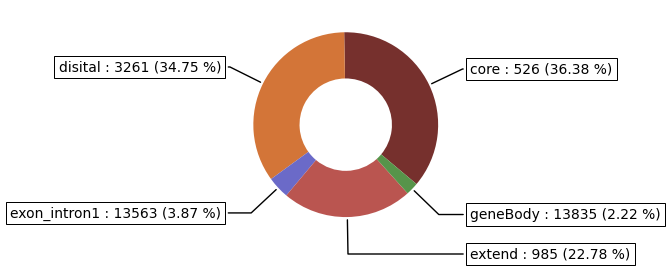

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_pie is your DataFrame containing counts and legend information
data = median_feature_len['counts_adj']
colors = ['#76302D', '#D37538', '#6B6AC8', '#BA5550' ,    '#57944A']  # Define your desired colors here

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Plotting the pie chart with specified colors
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(median_feature_len['legend'][i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw)
plt.savefig(figdir + '/pie.methylationAnnot.png', bbox_inches='tight',dpi=300,transparent=True)
plt.show()


In [10]:
df1 = pd.merge(df,exp, on = 'isoform', how = "inner")
df1

,hsm_chr,hsm_start,hsm_end,test,test,hsm_mat,hsm_pat,hsm_diff,hsm_diff_area,hsm_coor,...,strand,features,overlapbp,feature_len,mat_mean,pat_mean,M,D,prob,ranking
0,chr10,44014851,44015119,269,17,0.686465,0.327652,0.358813,129.655644,chr10:44014851-44015119,...,+,disital,182,649,158.0,869.0,-2.459432,711.0,0.976166,-711.004254
1,chr10,73087957,73088535,579,32,0.891414,0.324697,0.566717,327.834949,chr10:73087957-73088535,...,-,disital,69,649,172.0,0.5,8.426265,171.5,0.998193,171.706878
2,chr10,73087957,73088535,579,32,0.891414,0.324697,0.566717,327.834949,chr10:73087957-73088535,...,-,disital,389,649,119.0,0.5,7.894818,118.5,0.996787,118.762697
3,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,disital,242,649,0.5,83.0,-7.375039,82.5,0.993868,-82.828988
4,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,disital,242,649,57.0,0.5,6.832890,56.5,0.987149,56.911672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,chr8,10594046,10594203,158,14,0.782691,0.244159,0.538532,101.358284,chr8:10594046-10594203,...,+,exon_intron1,157,9819,0.5,13.0,-4.700440,12.5,0.901745,-13.354555
384,chr8,10594046,10594203,158,14,0.782691,0.244159,0.538532,101.358284,chr8:10594046-10594203,...,+,exon_intron1,157,8938,32.0,0.5,6.000000,31.5,0.967254,32.066337
385,chr8,96074981,96075363,383,20,0.105053,0.356890,-0.251837,-109.428665,chr8:96074981-96075363,...,+,exon_intron1,382,1029,0.5,16.0,-5.000000,15.5,0.921393,-16.286497
386,chr8,96074981,96075363,383,20,0.105053,0.356890,-0.251837,-109.428665,chr8:96074981-96075363,...,+,exon_intron1,382,8449,16.0,0.5,5.000000,15.5,0.921393,16.286497


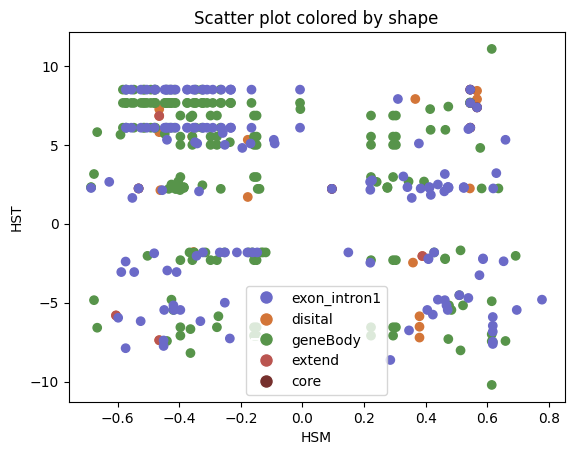

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual data)

# Create a dictionary to map categories to colors
color_map = {'disital': '#D37538', 
             'exon_intron1': '#6B6AC8', 
             'extend': '#BA5550',
             'geneBody' : '#57944A',
            'core':'#76302D'}

# Check if all categories in 'features' are in color_map
for category in df1['features']:
    if category not in color_map:
        print(f"Category '{category}' not found in color_map!")

# Convert shape variable to colors
colors = [color_map.get(s, 'gray') for s in df1['features']]  # Using 'gray' as default color for categories not in color_map

# Create scatter plot
scatter = plt.scatter(df1['hsm_diff'], df1['M'], c=colors)

# Add labels and title
plt.xlabel('HSM')
plt.ylabel('HST')
plt.title('Scatter plot colored by shape')

# Get unique shapes for legend
unique_shapes = list(set(df1['features']))

# Create legend with all unique shapes
legend_handles = []
for shape in unique_shapes:
    # Create dummy scatter plot for legend
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[shape], markersize=10, label=shape))

# Display legend
plt.legend(handles=legend_handles)
#plt.xscale('log')
# Show plot

plt.savefig('scatter_plot.png', dpi=300)
plt.show()


In [12]:
df1 = pd.merge(df,exp, on = 'isoform')
df1.head()

,hsm_chr,hsm_start,hsm_end,test,test,hsm_mat,hsm_pat,hsm_diff,hsm_diff_area,hsm_coor,...,strand,features,overlapbp,feature_len,mat_mean,pat_mean,M,D,prob,ranking
0,chr10,44014851,44015119,269,17,0.686465,0.327652,0.358813,129.655644,chr10:44014851-44015119,...,+,disital,182,649,158.0,869.0,-2.459432,711.0,0.976166,-711.004254
1,chr10,73087957,73088535,579,32,0.891414,0.324697,0.566717,327.834949,chr10:73087957-73088535,...,-,disital,69,649,172.0,0.5,8.426265,171.5,0.998193,171.706878
2,chr10,73087957,73088535,579,32,0.891414,0.324697,0.566717,327.834949,chr10:73087957-73088535,...,-,disital,389,649,119.0,0.5,7.894818,118.5,0.996787,118.762697
3,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,disital,242,649,0.5,83.0,-7.375039,82.5,0.993868,-82.828988
4,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,disital,242,649,57.0,0.5,6.832890,56.5,0.987149,56.911672


In [13]:
df1['features'].unique()

array(['disital', 'extend', 'core', 'geneBody', 'exon_intron1'],
      dtype=object)

In [16]:
df1.head()

,hsm_chr,hsm_start,hsm_end,test,test,hsm_mat,hsm_pat,hsm_diff,hsm_diff_area,hsm_coor,...,strand,features,overlapbp,feature_len,mat_mean,pat_mean,M,D,prob,ranking
0,chr10,44014851,44015119,269,17,0.686465,0.327652,0.358813,129.655644,chr10:44014851-44015119,...,+,disital,182,649,158.0,869.0,-2.459432,711.0,0.976166,-711.004254
1,chr10,73087957,73088535,579,32,0.891414,0.324697,0.566717,327.834949,chr10:73087957-73088535,...,-,disital,69,649,172.0,0.5,8.426265,171.5,0.998193,171.706878
2,chr10,73087957,73088535,579,32,0.891414,0.324697,0.566717,327.834949,chr10:73087957-73088535,...,-,disital,389,649,119.0,0.5,7.894818,118.5,0.996787,118.762697
3,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,disital,242,649,0.5,83.0,-7.375039,82.5,0.993868,-82.828988
4,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,disital,242,649,57.0,0.5,6.832890,56.5,0.987149,56.911672


/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/kimj75/anaconda3/envs/plot_

ValueError: Could not interpret value `features` for parameter `hue`

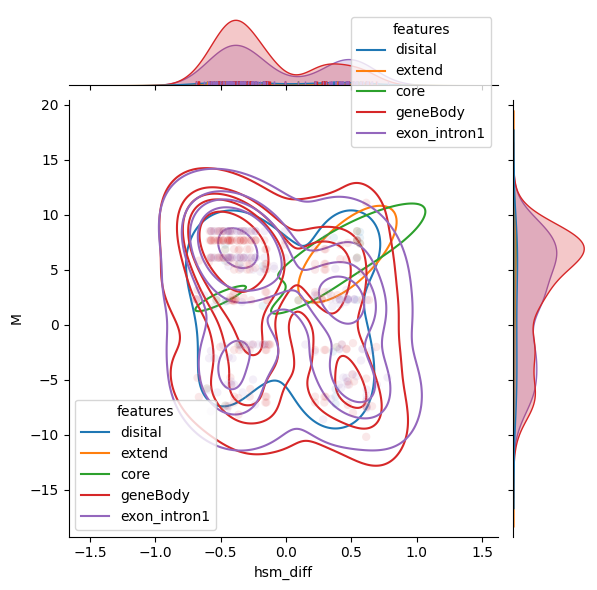

In [25]:
# Ensure 'features' is properly formatted
if 'features' not in df1.columns:
    raise ValueError("Column 'features' not found in the DataFrame.")

df1['features'] = df1['features'].fillna('Unknown').astype(str)

# Generate custom palette from unique 'features'
unique_features = df1['features'].unique()
color_map = {s: c for s, c in zip(unique_features, sns.color_palette('tab10', n_colors=len(unique_features)))}
custom_palette = sns.color_palette(list(color_map.values()))

sns.set_palette(custom_palette)

# Joint plot setup
g = sns.jointplot(
    data=df1, 
    x=x, 
    y=y, 
    hue="features", 
    alpha=0.1, 
    palette=custom_palette
)

# Add KDE plot for density
g.plot_joint(sns.kdeplot, hue=None, color="blue", zorder=0, levels=6)

# Add rug plot
rug_ax = g.ax_marg_x
sns.rugplot(data=df1, x=x, hue="features", ax=rug_ax, palette=custom_palette, height=0.05)

rug_ay = g.ax_marg_y
sns.rugplot(data=df1, y=y, hue="features", ax=rug_ay, palette=custom_palette, height=0.05, vertical=True)

# Adjust layout
plt.tight_layout()
plt.show()


/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/kimj75/anaconda3/envs/plot_

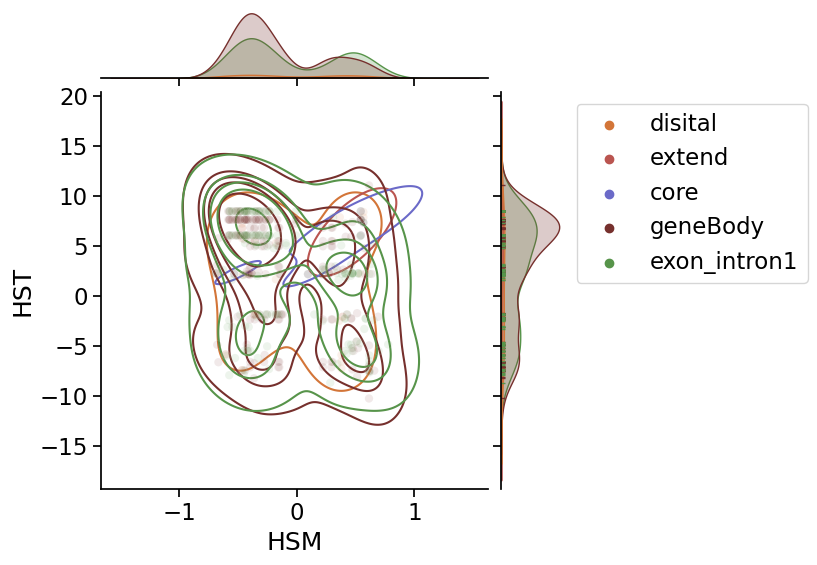

In [30]:


x= "hsm_diff"
y="M"
axis = 0.1
sns.set_context("notebook", font_scale=1.5)

color_map = {'disital': '#D37538',
             'extend': '#BA5550', 
             'exon_intron1': '#6B6AC8', 
              'core':'#76302D',
             'geneBody' : '#57944A',
             }
colors = [color_map.get(s, 'gray') for s in df1['features']]  # Using 'gray' as default color for categories not in color_map
custom_palette = sns.color_palette(list(color_map.values()))
sns.set_palette(custom_palette)
g = sns.jointplot(data=df1, x=x, y=y, hue="features",alpha = .1)
g.plot_joint(sns.kdeplot, color=colors, zorder=0, levels=6)
# g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
# Add rug plot
rug_ax = g.ax_marg_x
sns.rugplot(data=df1, x=x, hue="features", ax=rug_ay, palette=custom_palette, height=0.05, legend=False)


rug_ay = g.ax_marg_y
sns.rugplot(data=df1, y=y, hue="features", ax=rug_ay, palette=custom_palette, height=0.05, legend=False)



xmax = max(abs(df1[x]))
ymax = max(abs(df1[y]))
#plt.xlim(-xmax - axis, xmax+ axis)
#plt.ylim(-ymax - axis, ymax + axis)
# plt.ylim(-2000, 2000)
# plt.xlim(-600, 600)
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('HSM')
plt.ylabel('HST')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
fig.tight_layout()
# plt.tight_layout(rect=[.1, .1, 0.5, 1])
# plt.title('Scatter plot colored by shape')

plt.savefig(figdir + '/scatter_plot.hst-hsm.png', dpi=300, bbox_inches='tight')

plt.show()

In [15]:
df1[df1['features'] == 'core']

,hsm_chr,hsm_start,hsm_end,test,test,hsm_mat,hsm_pat,hsm_diff,hsm_diff_area,hsm_coor,...,strand,features,overlapbp,feature_len,mat_mean,pat_mean,M,D,prob,ranking
30,chr10,16455367,16456160,794,40,0.680404,0.135767,0.544637,437.470953,chr10:16455367-16456160,...,+,core,100,100,101.0,0.5,7.658211,100.5,0.995768,100.791360
31,chr10,16455367,16456160,794,40,0.680404,0.135767,0.544637,437.470953,chr10:16455367-16456160,...,+,core,100,100,34.0,0.5,6.087463,33.5,0.969988,34.048601
32,chr10,16455367,16456160,794,40,0.680404,0.135767,0.544637,437.470953,chr10:16455367-16456160,...,+,core,100,100,181.0,0.5,8.499846,180.5,0.998409,180.700020
33,chr10,73087957,73088535,579,32,0.891414,0.324697,0.566717,327.834949,chr10:73087957-73088535,...,-,core,100,100,83.0,0.5,7.375039,82.5,0.993868,82.828988
34,chr14,76854340,76854783,444,16,0.084449,0.616116,-0.531667,-231.130898,chr14:76854340-76854783,...,+,core,100,100,666.0,141.0,2.239827,525.0,0.971053,525.004778
35,chr9,106198345,106198893,549,71,0.165193,0.069514,0.095679,386.504613,chr9:106198345-106198893,...,+,core,100,100,51.0,11.0,2.212994,40.0,0.948934,40.061170


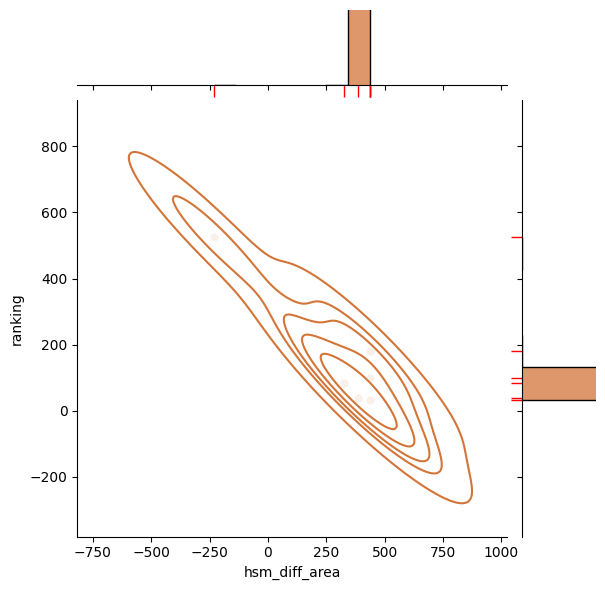

In [47]:
feat = 'core'
x= "hsm_diff_area"
y="ranking"
g = sns.jointplot(data=df1[df1['features']==feat], x=x, y=y,alpha = .1)
g.plot_joint(sns.kdeplot, zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)


In [43]:

meth = df1[df1['features'] == feat][x].to_list()
exp = df1[df1['features'] == feat][y].to_list()
correlation_coefficient, p_value = pearsonr(meth, exp)

print(feat)
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

extend
Pearson correlation coefficient: -0.13888799679131414
p-value: 0.701975590045605


In [20]:
df1[df1['features'] == 'core']

,hsm_chr,hsm_start,hsm_end,test,test,hsm_mat,hsm_pat,hsm_diff,hsm_diff_area,hsm_coor,...,strand,features,overlapbp,feature_len,mat_mean,pat_mean,M,D,prob,ranking
21,chr14,76854340,76854783,444,16,0.084449,0.616116,-0.531667,-231.130898,chr14:76854340-76854783,...,+,core,100,100,666.0,141.0,2.239827,525.0,0.971053,525.004778
35,chr10,16455367,16456160,794,40,0.680404,0.135767,0.544637,437.470953,chr10:16455367-16456160,...,+,core,100,100,101.0,0.5,7.658211,100.5,0.995768,100.791360
80,chr10,16455367,16456160,794,40,0.680404,0.135767,0.544637,437.470953,chr10:16455367-16456160,...,+,core,100,100,34.0,0.5,6.087463,33.5,0.969988,34.048601
124,chr10,16455367,16456160,794,40,0.680404,0.135767,0.544637,437.470953,chr10:16455367-16456160,...,+,core,100,100,181.0,0.5,8.499846,180.5,0.998409,180.700020
169,chr10,73087957,73088535,579,32,0.891414,0.324697,0.566717,327.834949,chr10:73087957-73088535,...,-,core,100,100,83.0,0.5,7.375039,82.5,0.993868,82.828988
172,chr9,106198345,106198893,549,71,0.165193,0.069514,0.095679,386.504613,chr9:106198345-106198893,...,+,core,100,100,51.0,11.0,2.212994,40.0,0.948934,40.061170


In [21]:
q1 = pd.DataFrame(df1[(df1['hsm_diff'] <0 ) & (df1['M'] > 0)].groupby('features').size(),  columns= ['q1'])
q2 = pd.DataFrame(df1[(df1['hsm_diff'] >0 ) & (df1['M'] > 0)].groupby('features').size(), columns= ['q2'])
q3 = pd.DataFrame(df1[(df1['hsm_diff'] <0 ) & (df1['M'] < 0)].groupby('features').size(), columns= ['q3'])
q4 = pd.DataFrame(df1[(df1['hsm_diff'] >0 ) & (df1['M'] < 0)].groupby('features').size(), columns= ['q4'])

In [22]:
q12 = pd.merge(q1, q2, on = 'features', how = 'outer')
q34 = pd.merge(q3, q4, on = 'features', how = 'outer')
q1234 = pd.merge(q12, q34, on = 'features', how = 'outer')
q1234

,q1,q2,q3,q4
features,,,,
core,1,5,NaN,NaN
disital,7,4,4.0,5.0
exon_intron1,70,34,26.0,26.0
extend,2,5,2.0,1.0
geneBody,113,27,31.0,25.0


In [23]:
df['hst-hsm'] = df1['hsm_diff'] * df1['M']

In [25]:
df[df['hst-hsm'] >0 ]

,hsm_chr,hsm_start,hsm_end,test,test,hsm_mat,hsm_pat,hsm_diff,hsm_diff_area,hsm_coor,...,trans_start,trans_end,isoform,gene,tss,strand,features,overlapbp,feature_len,hst-hsm
1,chr1,494816,494910,95,8,0.209183,0.051742,0.157440,40.404386,chr1:494816-494910,...,494700,495349,transcript669.chr1.nnic,novel_gene_chr1_670,491013,-,disital,94,649,4.775307
2,chr1,494816,494910,95,8,0.209183,0.051742,0.157440,40.404386,chr1:494816-494910,...,494700,495349,transcript678.chr1.nnic,novel_gene_chr1_679,491013,-,disital,94,649,4.474127
3,chr1,494816,494910,95,8,0.209183,0.051742,0.157440,40.404386,chr1:494816-494910,...,494737,495386,transcript667.chr1.nnic,novel_gene_chr1_668,491013,-,disital,94,649,3.427350
4,chr1,494816,494910,95,8,0.209183,0.051742,0.157440,40.404386,chr1:494816-494910,...,494737,495386,transcript676.chr1.nnic,novel_gene_chr1_677,491013,-,disital,94,649,3.427350
9,chr1,1049071,1049248,178,8,0.382037,0.168543,0.213494,39.192208,chr1:1049071-1049248,...,1049005,1049654,TCONS_00000130,XLOC_000034,1050005,+,disital,177,649,3.513322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,chr10,60563603,60564038,436,42,0.236323,0.089840,0.146483,240.302063,chr10:60563603-60564038,...,60563938,60564587,TCONS_00024953,XLOC_006212,60504785,-,disital,100,649,1.669802
382,chr10,71002157,71002259,103,4,0.135038,0.412539,-0.277501,-25.552362,chr10:71002157-71002259,...,71002158,71002807,TCONS_00025205,XLOC_006276,70981272,-,disital,101,649,1.249333
383,chr10,72645133,72645632,500,7,0.113060,0.673791,-0.560731,-46.762202,chr10:72645133-72645632,...,72644603,72645252,TCONS_00025289,XLOC_006297,72618370,-,disital,119,649,1.798173
385,chr10,73087957,73088535,579,32,0.891414,0.324697,0.566717,327.834949,chr10:73087957-73088535,...,73087377,73088026,TCONS_00025302,XLOC_006301,72966865,-,disital,69,649,3.231191


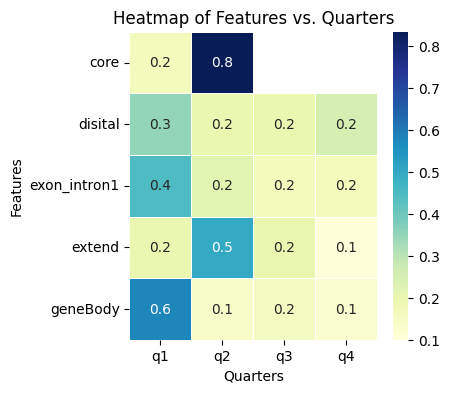

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = q1234
df_normalized = data.apply(lambda row: row / row.sum(), axis=1)
df_normalized = df_normalized.apply(lambda col: col / col.sum(), axis=1)
# Create heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(df_normalized, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)

# Add title and labels
plt.title('Heatmap of Features vs. Quarters')
plt.xlabel('Quarters')
plt.ylabel('Features')

# Show plot
plt.show()


In [154]:
df1['features'].unique()

array(['disital', 'extend', 'exon_intron1', 'core', 'geneBody'],
      dtype=object)

In [28]:
feat = 'core'
meth = df1[df1['features'] == feat]['hsm_diff_area'].to_list()
exp = df1[df1['features'] == feat]['ranking'].to_list()
correlation_coefficient, p_value = pearsonr(meth, exp)

print(feat)
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

core
Pearson correlation coefficient: -0.9335738791318822
p-value: 0.006472094011618688


In [156]:
df1[df1['hsm_diff_area'] * df1['ranking'] < 0]

,hsm_chr,hsm_start,hsm_end,test,test,hsm_mat,hsm_pat,hsm_diff,hsm_diff_area,hsm_coor,...,strand,features,overlapbp,feature_len,mat_mean,pat_mean,M,D,prob,ranking
0,chr10,44014851,44015119,269,17,0.686465,0.327652,0.358813,129.655644,chr10:44014851-44015119,...,+,disital,182,649,158.0,869.0,-2.459432,711.0,0.976166,-711.004254
5,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,disital,242,649,57.0,0.5,6.832890,56.5,0.987149,56.911672
6,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,extend,248,299,57.0,0.5,6.832890,56.5,0.987149,56.911672
7,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,disital,318,649,77.0,0.5,7.266787,76.5,0.992895,76.844363
8,chr10,80947231,80947722,492,16,0.215700,0.680423,-0.464723,-166.845626,chr10:80947231-80947722,...,+,disital,318,649,28.0,0.5,5.807355,27.5,0.960195,28.106501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,chr15,40303018,40303179,162,4,0.444215,0.883759,-0.439544,-21.235363,chr15:40303018-40303179,...,+,exon_intron1,161,16198,20.0,0.5,5.321928,19.5,0.939867,20.213187
377,chr2,208002432,208003100,669,23,0.677225,0.102694,0.574531,302.878955,chr2:208002432-208003100,...,-,exon_intron1,489,926,445.0,4257.0,-3.257960,3812.0,0.996973,-3812.001392
378,chr4,41965072,41965328,257,8,0.171957,0.430542,-0.258585,-41.865201,chr4:41965072-41965328,...,+,exon_intron1,256,11120,27.0,0.5,5.754888,26.5,0.958588,27.117683
384,chr8,10594046,10594203,158,14,0.782691,0.244159,0.538532,101.358284,chr8:10594046-10594203,...,+,exon_intron1,157,9819,0.5,13.0,-4.700440,12.5,0.901745,-13.354555


In [157]:
df_pie1= pd.DataFrame(df1.groupby(['features']).size()).reset_index()
df_pie1.columns = ['annot', 'counts']
df_pie1['perc'] = round(df_pie1['counts'] * 100 /sum(df_pie1['counts']),2)
df_pie1['legend'] = df_pie1['annot'] + " " + df_pie1['perc'].astype(str) + "% (" + df_pie1['counts'].astype(str) + ")"
df_pie1

,annot,counts,perc,legend
0,core,6,1.55,core 1.55% (6)
1,disital,20,5.15,disital 5.15% (20)
2,exon_intron1,156,40.21,exon_intron1 40.21% (156)
3,extend,10,2.58,extend 2.58% (10)
4,geneBody,196,50.52,geneBody 50.52% (196)


In [159]:
pd.merge(df_pie, df_pie1, on = 'annot')

,annot,counts_x,perc_x,legend_x,counts_y,perc_y,legend_y
0,core,526,1.64,core 1.64% (526),6,1.55,core 1.55% (6)
1,disital,3261,10.14,disital 10.14% (3261),20,5.15,disital 5.15% (20)
2,exon_intron1,13563,42.16,exon_intron1 42.16% (13563),156,40.21,exon_intron1 40.21% (156)
3,extend,985,3.06,extend 3.06% (985),10,2.58,extend 2.58% (10)
4,geneBody,13835,43.01,geneBody 43.01% (13835),196,50.52,geneBody 50.52% (196)


In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_pie is your DataFrame containing counts and legend information
data = df_pie2['counts']
colors = ['#76302D', '#D37538', '#BA5550', '#57944A', '#6B6AC8']  # Define your desired colors here

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Plotting the pie chart with specified colors
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(df_pie2['legend'][i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw)
plt.savefig(figdir + '/pie.methylationAnnot.png', bbox_inches='tight',dpi=300,transparent=True)
plt.show()


NameError: name 'df_pie2' is not defined

In [174]:
test = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/10.interpretation/HST-HSM/isoquantOut/HST.core.mat_pat.tsv",
                   sep ='\t',
                   header = None)
test = test[[3,8,9]]
test.columns = ['isoform','mat','pat']

In [175]:
test1 = pd.merge(test,exp, on= 'isoform')
test1['hap']="pat"
test1.loc[test1['M'] > 0, 'hap'] = "mat"
test1 = test1[['hap','mat','pat']]
test1.head()

,hap,mat,pat
0,pat,0,0
1,mat,0,0
2,pat,0,0
3,pat,0,0
4,mat,0,0


In [176]:

# Melt the DataFrame to reshape it
df_melted = pd.melt(test1, id_vars='hap', var_name='source', value_name='value')

# Rename the 'known_imprinted' column to 'category'
df_melted = df_melted.rename(columns={'hap': 'category'})

# Map the source values to 'mat' and 'pat'
df_melted['source'] = df_melted['source'].map({'mat': 'Maternal', 'pat': 'Paternal'})
# Assuming df_melted is your DataFrame
df_melted['value'] = pd.to_numeric(df_melted['value'], errors='coerce')
df_melted['value'] = df_melted['value']*.01
print(df_melted)

    category    source    value
0        pat  Maternal  0.00000
1        mat  Maternal  0.00000
2        pat  Maternal  0.00000
3        pat  Maternal  0.00000
4        mat  Maternal  0.00000
..       ...       ...      ...
569      mat  Paternal  0.00000
570      pat  Paternal  0.00000
571      pat  Paternal  0.98195
572      mat  Paternal  0.00000
573      mat  Paternal  0.00000

[574 rows x 3 columns]


NameError: name 'add_stat_annotation' is not defined

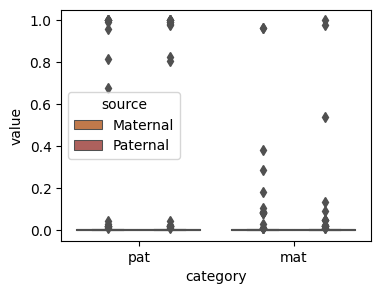

In [177]:
fig, ax = plt.subplots(figsize=(4, 3))

x = "category"
y = "value"
hue = "source"
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue,
                # frameon = False,
                )
add_stat_annotation(ax, data=df_melted, x=x, y=y, hue=hue,
                    box_pairs=[(("Maternal", "Maternal"), ("Maternal", "Paternal")),
                                 (("Paternal", "Maternal"), ("Paternal", "Paternal"))
                                ],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)

ax.set_ylabel('methylation levels')
ax.set_xlabel('Known imprinted methylation')


ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(0,1)
plt.legend(title='HG002 haplotype' , loc='upper left', bbox_to_anchor=(1.03, 1),frameon=False)

plt.savefig(figdir + '/boxplot.methLevel.matvspat.inknownonly.png', bbox_inches='tight',dpi=300,transparent=True)